In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy import wcs
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib

In [2]:
def ThetaPhitoDeclRa(theta,phi):
    dec = -1*np.degrees(theta)+90
    ra  = np.degrees(phi)
    ra[ra>180] = -360 + ra[ra>180]
    return dec,ra

In [48]:
latmin = -75
latmax = 15
lonmin = -60
lonmax = 110

def get_peakinfo(filename):
    peakfile = fits.open(filename)
    peakinfo = peakfile[0].data
    rot_angle = peakinfo[:,3]
    theta,phi = peakinfo[:,1], peakinfo[:,2]
    dec,ra = ThetaPhitoDeclRa(theta,phi)

    ra = np.asarray(ra)
    dec = np.asarray(dec)
    in_region = (ra>lonmin) & (ra < lonmax) & (dec < latmax) & (dec > latmin)
    dec = dec[in_region]
    rot_angle = rot_angle[in_region]
    ra = ra[in_region]
    return (rot_angle,ra,dec)

def read_amp_map(amp_file):
    amp_map = fits.open(amp_file)
    amp_map[1].header['TTYPE3'] = 'ID2'
    amp_map.writeto(amp_file, overwrite=True)
    amp_map.close()
    return hp.read_map(amp_file, field=0)

In [64]:
def calc_offsets(rot_angle_pct, rot_angle_all):
    diffs = []
    for i in range(len(
                       )):
        a = rot_angle_pct[i] - rot_angle_all[i]
        a = (a + np.pi) % (2*np.pi) - np.pi
        diffs.append(abs(a))
    diffs = np.asarray(diffs)
    diffs[diffs>(np.pi/2.)]-=np.pi
    diffs = (np.abs(diffs)*u.rad).to(u.deg)
    return diffs


In [76]:
rot_angle_all, ra_all, dec_all = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin1_smth20Mpc_pks.fits")
rot_angle_75, ra_75, dec_75 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin175pct_smth20Mpc_pks.fits")
rot_angle_50, ra_50, dec_50 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin150pct_smth20Mpc_pks.fits")
rot_angle_25, ra_25, dec_25 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin125pct_smth20Mpc_pks.fits")

rot_angle_all_lgt15, ra_all_lgt15, dec_all_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin1_pks.fits")
rot_angle_75_lgt15, ra_75_lgt15, dec_75_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin175pct_pks.fits")
rot_angle_50_lgt15, ra_50_lgt15, dec_50_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin150pct_pks.fits")
rot_angle_25_lgt15, ra_25_lgt15, dec_25_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin125pct_pks.fits")

rot_angle_all_lgt10, ra_all_lgt10, dec_all_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin1_pks.fits")
rot_angle_75_lgt10, ra_75_lgt10, dec_75_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin175pct_pks.fits")
rot_angle_50_lgt10, ra_50_lgt10, dec_50_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin150pct_pks.fits")
rot_angle_25_lgt10, ra_25_lgt10, dec_25_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin125pct_pks.fits")

#lambda>20 and 10 Mpc smoothing
rot_angle_all_smth10, ra_all_smth10, dec_all_smth10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin1_smth10Mpc_pks.fits")
rot_angle_75_smth10, ra_75_smth10, dec_75_smth10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin175pct_smth10Mpc_pks.fits")
rot_angle_50_smth10, ra_50_smth10, dec_50_smth10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin150pct_smth10Mpc_pks.fits")
rot_angle_25_smth10, ra_25_smth10, dec_25_smth10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt20_bin125pct_smth10Mpc_pks.fits")

#lambda>15 and 10 Mpc smoothing
rot_angle_all_smth10_lgt15, ra_all_smth10_lgt15, dec_all_smth10_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin1_smth10Mpc_pks.fits")
rot_angle_75_smth10_lgt15, ra_75_smth10_lgt15, dec_75_smth10_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin175pct_smth10Mpc_pks.fits")
rot_angle_50_smth10_lgt15, ra_50_smth10_lgt15, dec_50_smth10_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin150pct_smth10Mpc_pks.fits")
rot_angle_25_smth10_lgt15, ra_25_smth10_lgt15, dec_25_smth10_lgt15 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt15_bin125pct_smth10Mpc_pks.fits")

#lambda>10 and 10 Mpc smoothing
rot_angle_all_smth10_lgt10, ra_all_smth10_lgt10, dec_all_smth10_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin1_smth10Mpc_pks.fits")
rot_angle_75_smth10_lgt10, ra_75_smth10_lgt10, dec_75_smth10_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin175pct_smth10Mpc_pks.fits")
rot_angle_50_smth10_lgt10, ra_50_smth10_lgt10, dec_50_smth10_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin150pct_smth10Mpc_pks.fits")
rot_angle_25_smth10_lgt10, ra_25_smth10_lgt10, dec_25_smth10_lgt10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/maglim_tests/maglim_lgt10_bin125pct_smth10Mpc_pks.fits")


In [10]:
odmap_all   = hp.read_map('/mnt/raid-cita//mlokken/data/number_density_maps/maglim/odmap_bin1.fits')
odmap_all_s = hp.smoothing(odmap_all, fwhm=np.deg2rad(100/60.))

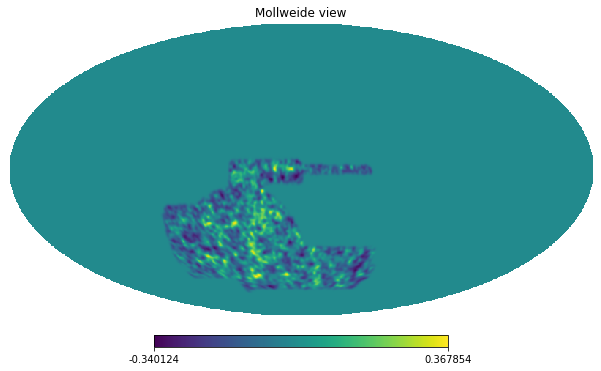

In [11]:
hp.mollview(odmap_all_s)

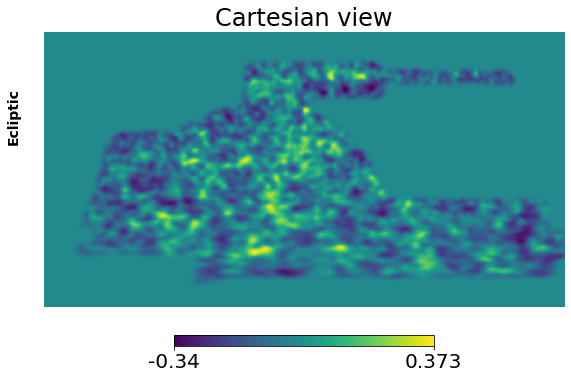

In [49]:
odmap_flat_all = hp.cartview(odmap_all_s, latra=[latmin,latmax], lonra=[lonmin,lonmax], return_projected_map=True, coord='E')

In [51]:
w = wcs.WCS(naxis=2)

height = float(odmap_flat_all.shape[0])
length = float(odmap_flat_all.shape[1])
w = wcs.WCS(naxis=2)
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmin-latmax)/height, (latmin+latmax)/2.

w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]


[400. 212.]
[ 25. -30.]
[-0.2125     -0.21226415]


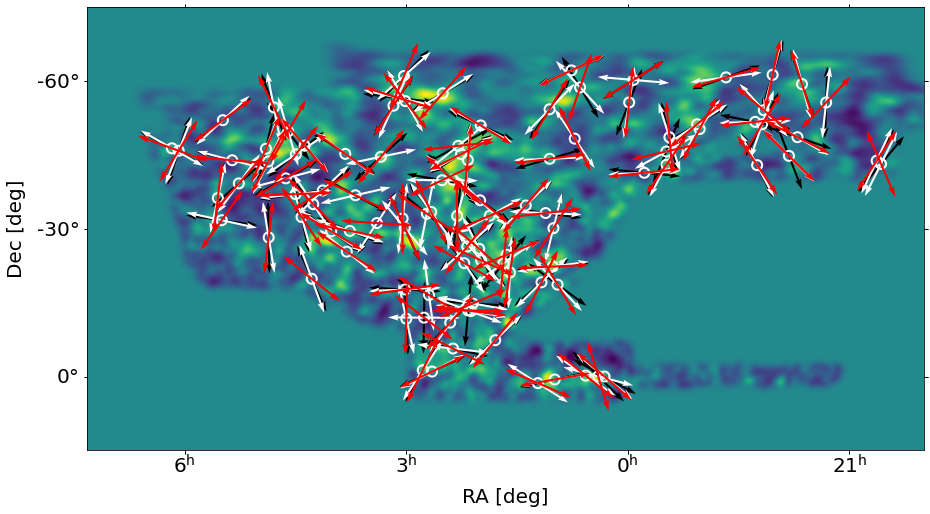

In [52]:
choice = np.random.choice(np.arange(len(ra_all)), size=100, replace=False)
Xpix,Ypix = w.all_world2pix(ra_all,dec_all,0)
Xpix,Ypix = Xpix[choice], Ypix[choice]
def get_vector_components(rot_angle):
    U_arr = np.zeros(len(rot_angle))
    V_arr = np.zeros(len(rot_angle))
    m = 0
    for r in rot_angle:

        if (r <= np.pi/2.) or (r > 3*np.pi/2.):
            U = 1/np.sqrt(1+np.tan(r)**2)
        else:
            U = -1/np.sqrt(1+np.tan(r)**2)
        V = U * np.tan(r)
        U_arr[m] = U
        V_arr[m] = V
        m += 1
    return U_arr, V_arr

# Make the figure

plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(odmap_flat_all[::-1])
# ax = plt.subplot(projection=w)
plt.xlabel("RA [deg]")
ax1.set_ylabel("Dec [deg]")

U_arr_all, V_arr_all = get_vector_components(rot_angle_all[choice])
ax1.quiver(Xpix,Ypix, -U_arr_all, V_arr_all, width=0.0025, color = 'k', scale_units = 'inches', scale = 2)
ax1.quiver(Xpix,Ypix, U_arr_all, -V_arr_all, width=0.0025, color = 'k', scale = 2, scale_units = 'inches')
ax1.scatter(Xpix,Ypix, s=100, edgecolor='w', facecolor='none', linewidths=2)

U_arr_50, V_arr_50 = get_vector_components(rot_angle_50[choice])
ax1.quiver(Xpix,Ypix, -U_arr_50, V_arr_50, width=0.0025, color = 'w', scale_units = 'inches', scale = 2)
ax1.quiver(Xpix,Ypix, U_arr_50, -V_arr_50, width=0.0025, color = 'w', scale = 2, scale_units = 'inches')

U_arr_25, V_arr_25 = get_vector_components(rot_angle_25[choice])
ax1.quiver(Xpix,Ypix, -U_arr_25, V_arr_25, width=0.0025, color = 'r', scale_units = 'inches', scale = 2)
ax1.quiver(Xpix,Ypix, U_arr_25, -V_arr_25, width=0.0025, color = 'r', scale = 2, scale_units = 'inches')


In [77]:
offsets_75 = calc_offsets(rot_angle_75, rot_angle_all)
offsets_50 = calc_offsets(rot_angle_50, rot_angle_all)
offsets_25 = calc_offsets(rot_angle_25, rot_angle_all)

offsets_75_lgt15 = calc_offsets(rot_angle_75_lgt15, rot_angle_all_lgt15)
offsets_50_lgt15 = calc_offsets(rot_angle_50_lgt15, rot_angle_all_lgt15)
offsets_25_lgt15 = calc_offsets(rot_angle_25_lgt15, rot_angle_all_lgt15)

offsets_75_lgt10 = calc_offsets(rot_angle_75_lgt10, rot_angle_all_lgt10)
offsets_50_lgt10 = calc_offsets(rot_angle_50_lgt10, rot_angle_all_lgt10)
offsets_25_lgt10 = calc_offsets(rot_angle_25_lgt10, rot_angle_all_lgt10)

offsets_75_smth10 = calc_offsets(rot_angle_75_smth10, rot_angle_all_smth10)
offsets_50_smth10 = calc_offsets(rot_angle_50_smth10, rot_angle_all_smth10)
offsets_25_smth10 = calc_offsets(rot_angle_25_smth10, rot_angle_all_smth10)

offsets_75_smth10_lgt15 = calc_offsets(rot_angle_75_smth10_lgt15, rot_angle_all_smth10_lgt15)
offsets_50_smth10_lgt15 = calc_offsets(rot_angle_50_smth10_lgt15, rot_angle_all_smth10_lgt15)
offsets_25_smth10_lgt15 = calc_offsets(rot_angle_25_smth10_lgt15, rot_angle_all_smth10_lgt15)

offsets_75_smth10_lgt10 = calc_offsets(rot_angle_75_smth10_lgt10, rot_angle_all_smth10_lgt10)
offsets_50_smth10_lgt10 = calc_offsets(rot_angle_50_smth10_lgt10, rot_angle_all_smth10_lgt10)
offsets_25_smth10_lgt10 = calc_offsets(rot_angle_25_smth10_lgt10, rot_angle_all_smth10_lgt10)


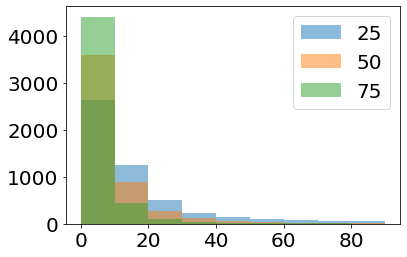

In [60]:
bins=np.linspace(0,90,10)

plt.hist(offsets_25.value, bins, alpha=.5, label='25')
plt.hist(offsets_50.value, bins, alpha=.5, label='50')
plt.hist(offsets_75.value, bins, alpha=.5, label='75')
plt.legend()

(0.15, 0.85)

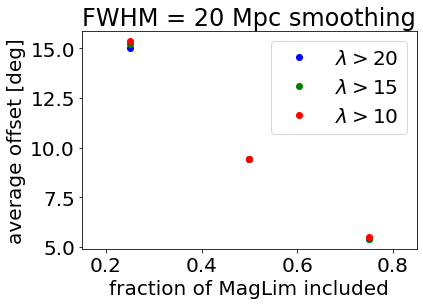

In [86]:
plt.plot([.25, .5, .75], [np.average(offsets_25).value, np.average(offsets_50).value, np.average(offsets_75).value], 'bo', label=r'$\lambda>20$')
plt.plot([.25, .5, .75], [np.average(offsets_25_lgt15).value, np.average(offsets_50_lgt15).value, np.average(offsets_75_lgt15).value], 'go', label=r'$\lambda>15$')
plt.plot([.25, .5, .75], [np.average(offsets_25_lgt10).value, np.average(offsets_50_lgt10).value, np.average(offsets_75_lgt10).value], 'ro', label=r'$\lambda>10$')
plt.legend()
plt.title("FWHM = 20 Mpc smoothing")
plt.ylabel("average offset [deg]")
plt.xlabel("fraction of MagLim included")
plt.xlim([.15,.85])

Text(0.5, 0, 'percentage of MagLim included')

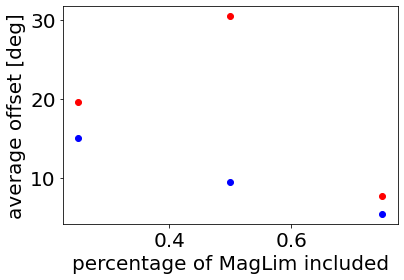

In [70]:
plt.plot([.25, .5, .75], [np.average(offsets_25).value, np.average(offsets_50).value, np.average(offsets_75).value], 'bo')
plt.ylabel("average offset [deg]")
plt.xlabel("percentage of MagLim included")
plt.plot([.25, .5, .75], [np.average(offsets_25_smth10).value, np.average(offsets_50_smth10).value, np.average(offsets_75_smth10).value], 'ro')
plt.ylabel("average offset [deg]")
plt.xlabel("percentage of MagLim included")

Text(0.5, 0, 'percentage of MagLim included')

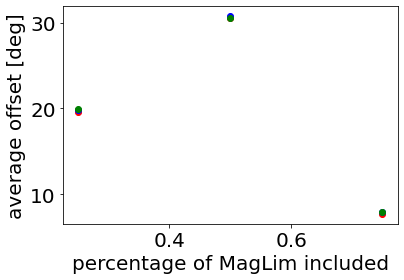

In [78]:
plt.plot([.25, .5, .75], [np.average(offsets_25_smth10).value, np.average(offsets_50_smth10).value, np.average(offsets_75_smth10).value], 'ro')
plt.ylabel("average offset [deg]")
plt.xlabel("percentage of MagLim included")

plt.plot([.25, .5, .75], [np.average(offsets_25_smth10_lgt15).value, np.average(offsets_50_smth10_lgt15).value, np.average(offsets_75_smth10_lgt15).value], 'bo')
plt.ylabel("average offset [deg]")
plt.xlabel("percentage of MagLim included")

plt.plot([.25, .5, .75], [np.average(offsets_25_smth10_lgt10).value, np.average(offsets_50_smth10_lgt10).value, np.average(offsets_75_smth10_lgt10).value], 'go')
plt.ylabel("average offset [deg]")
plt.xlabel("percentage of MagLim included")

In [87]:
from astropy.cosmology import Planck18 as p18

Text(0.5, 1.0, '80 cMpc')

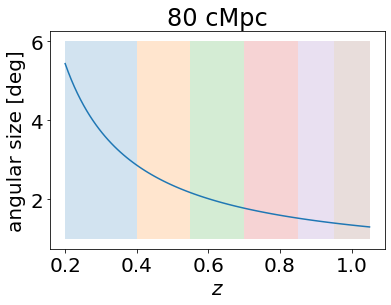

In [105]:
zrange = np.linspace(0.2,1.05,100)
i = 0
zbins = [0.20, 0.40, 0.55, 0.70, 0.85, 0.95, 1.05]
for i in range(len(zbins)-1):
    plt.fill_betweenx(np.linspace(1,6,10), np.full(10,zbins[i]), np.full(10,zbins[i+1]), alpha=.2)
degs = p18.arcsec_per_kpc_comoving(zrange).to(u.deg/u.Mpc)*80*u.Mpc
plt.plot(zrange, degs.value)
plt.ylabel('angular size [deg]')
plt.xlabel(r"$z$")
plt.title("80 cMpc")